<a href="https://colab.research.google.com/github/nestormontano/PrDS_2024__PredictingChurnForBankCustomers/blob/main/eda_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install skimpy

In [1]:
import numpy as np
import pandas as pd

In [2]:
import skimpy

## Premilinares
### Importacion

In [3]:
data= pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Corregir datos

In [6]:
data.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

0       no
1       si
2       no
3       si
4       no
        ..
9995    no
9996    no
9997    si
9998    no
9999    no
Length: 10000, dtype: object

In [7]:
data['HasCrCard']= data.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

In [8]:
data['IsActiveMember']= data.apply( lambda x: 'si' if x['IsActiveMember'] == 0 else 'no', axis=1)

In [9]:
del data['RowNumber']

In [10]:
data['CustomerId']= data['CustomerId'].to_string()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  object 
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1015.8+ KB


In [12]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ CreditScore        │   0 │     0 │     650 │     97 │  350 │    580 │     650 │     720 │     850 │  ▂▅▇▆▃ │  │
│ │ Age                │   0 │     0 │      39 │     10 │   18 │     32 │      37 │      44 │      92 │  ▃▇▃▁  │  │
│ │ Tenure             │   0 │     0 │       5 │    2.9 │    0 │      3 │       5 │       7 │      10 │ ▆▇▃▇▇▆ │  │
│ │ Balance            │   0 │     0 │   76000 │  62000 │    0 │      0 │   97000 │  130000 │  250000 │ ▇▂▆▅▁  │  │
│ │ NumOfProducts      │   0 │     0 │     1.5 │   0.58 │    1 │      1 │       1 │       2 │       4 │  ▇ ▇   │  │
│ │ EstimatedSalary    │   0 │     0 │  100000 │  58000 │   12 │  51000 │  100000 │  150000 │  200000 │ ▇▇▇▇▇▇ │  │
│ │ Exited             │   0 │     0 │     0.2 │    0.4 │    0 │      0 │       0 │       0 │       1 │ ▇    ▂ │  │
│ └────────────────────┴─────┴───────┴─────────┴────────┴──────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CustomerId                    │      0 │          0 │                       41000 │              411110000 │  │
│ │ Surname                       │      0 │          0 │                           1 │                  10055 │  │
│ │ Geography                     │      0 │          0 │                           1 │                  10000 │  │
│ │ Gender                        │      0 │          0 │                           1 │                  10000 │  │
│ │ HasCrCard                     │      0 │          0 │                           1 │                  10000 │  │
│ │ IsActiveMember                │      0 │          0 │                           1 │                  10000 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## EDA Bivariado

Grupo 5
Predicting Churn for Bank Customers - Geography

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [30]:
df = data[['Geography','Tenure','HasCrCard']]
#

In [29]:
df.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

0       no
1       no
2       no
3       no
4       no
        ..
9995    no
9996    no
9997    no
9998    no
9999    no
Length: 10000, dtype: object

In [ ]:
df.head()

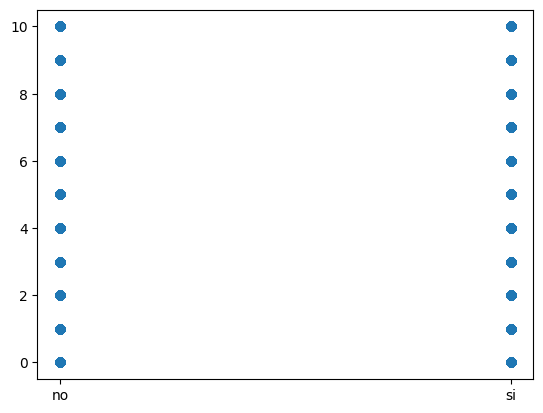

In [37]:
plt.scatter(df.HasCrCard, df.Tenure)


In [42]:
dfg = df.groupby('Geography')
dfg.describe()

Tenure                                              
            count      mean       std  min  25%  50%  75%   max
Geography                                                      
France     5014.0  5.004587  2.888475  0.0  2.0  5.0  7.0  10.0
Germany    2509.0  5.009964  2.935154  0.0  2.0  5.0  8.0  10.0
Spain      2477.0  5.032297  2.856660  0.0  3.0  5.0  8.0  10.0